<a href="https://colab.research.google.com/github/clrpauline/Earth_temperature/blob/main/Volkswagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Temporalité** : 2015 - 2022  -
**Colonnes** : type de voiture  -
**Lignes** : années + production associée par type de véhicule

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Véhicules Passagers Production

In [101]:
def modif(df):
  df.dropna(axis=0, how= 'any', inplace = True)
  df.columns=df.iloc[0,:]
  df.reset_index(drop=True, inplace =True)
  df.drop([0],inplace=True)
  df.drop(df.columns[-1], axis=1, inplace=True)
  df = df.rename(columns={'Units': 'Année'})
  df.set_index('Année',inplace=True)
  df=df.T
  df.index = df.index.astype("int")
  return df

In [102]:
annees=[15,16,17,18,19,20,21,22]


In [103]:

dftot=pd.DataFrame()
for an in annees:
  if an < 20:
    lien="https://annualreport20"+str(an)+".volkswagenag.com/servicepages/downloads/files/vw_pc_production_vw_ar"+str(an)+".xls"
    df = pd.read_excel(lien)
  elif an == 20 :
    lien ="https://annualreport20"+str(an)+".volkswagenag.com/servicepages/downloads/files/div-vw-pc-production-vw-ar"+str(an)+".xls"
    df = pd.read_excel(lien)
  else:
    lien ="https://annualreport20"+str(an)+".volkswagenag.com/_assets/downloads/div-vw-pc-production-vw-ar"+str(an)+".xlsx"
    df = pd.read_excel(lien)
  df=modif(df)
  dftot=pd.concat([dftot,df])
dftot

Année,Golf,Jetta/Sagitar,Polo,Passat/Magotan,Tiguan,Lavida,Santana,Bora,Gol,up!,...,ID.3,JETTA,Tharu/Taos,Sharan/Viloran,Fox/Suran,ID.4,Polo/Virtus/Nivus/Taigo,T-Cross/Tacqua/Taigun,ID.6,"ID.4, ID.5"
2015,1095553.0,844907.0,754546.0,724018.0,501712.0,462748.0,279583.0,202964.0,192841.0,172345.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,982495,968135,794388,711878,548687,547187,312177,236427,160130,169970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,968284,883346,755506,660996,769870,507574,293313,334900,203148,158795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,805752,770447,NaN,656249,861331,513556,272080,269390,156410,136512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,679351.0,610327.0,NaN,543706.0,910926.0,514698.0,244132.0,345077.0,151241.0,108676.0,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,408528,422908,NaN,477892,754276,416209,174966,329263,117471,59786,...,64259,165681,149781,32142,12184,6487,NaN,NaN,NaN,NaN
2021,267352.0,295490.0,NaN,379614.0,598656.0,394222.0,138232.0,242022.0,131129.0,75616.0,...,73738.0,157157.0,206789.0,16806.0,18162.0,134319.0,453479.0,295101.0,20461.0,NaN
2022,300090,292038,NaN,447246,604536,377284,111422,210896,122575,33317,...,83432,148666,216397,30888,–,NaN,448043,315036,38846,207934


In [104]:
dftot.replace({np.nan: 0, '–': 0, '0': 0.0}, inplace=True)
dftot = dftot.astype('float')

<ipython-input-105-8caa60ba68ad>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


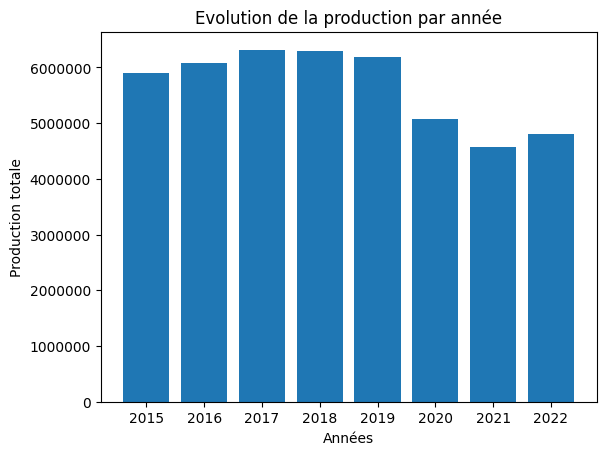

In [105]:
x = dftot.index
y = dftot.sum(axis=1)
plt.bar(x,y)
plt.xlabel('Années')
plt.ylabel('Production totale')
plt.title('Evolution de la production par année')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()


<ipython-input-106-c42952d3e132>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


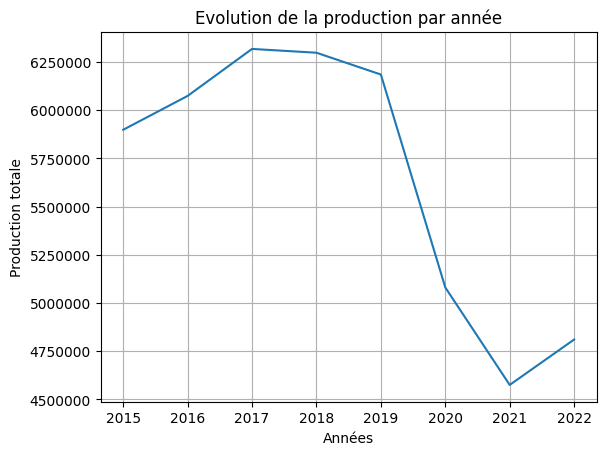

In [106]:
plt.grid(True)
plt.plot(x,y)
plt.xlabel('Années')
plt.ylabel('Production totale')
plt.title('Evolution de la production par année')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

<ipython-input-107-7ba11430f8f4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


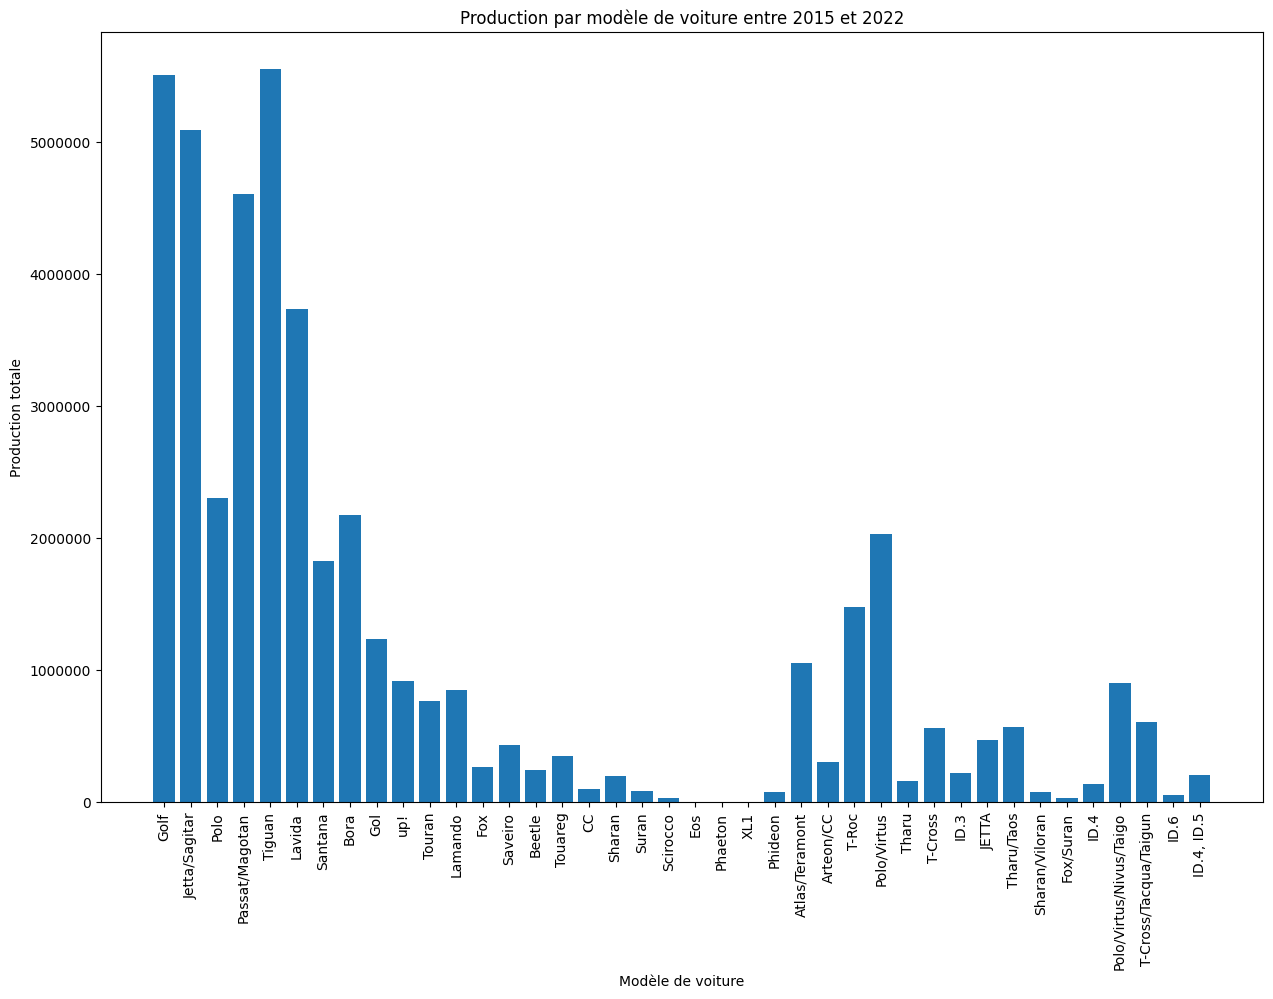

In [107]:
x = dftot.columns
y = dftot.sum(axis=0)
plt.figure(figsize=(15,10))
plt.bar(x,y)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.xlabel('Modèle de voiture')
plt.ylabel('Production totale')
plt.title(f'Production par modèle de voiture entre {dftot.index.min()} et {dftot.index.max()}')
plt.xticks(rotation=90, fontsize=10)

plt.show()


In [108]:
def produ_model(modele):
  x=dftot.index
  y=dftot[modele]
  plt.bar(x,y)
  plt.xlabel('Années')
  plt.ylabel('Production')
  plt.title('Evolution de la production par année du modèle : '+ modele)
  current_values = plt.gca().get_yticks()
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
  plt.show()

In [109]:
print(dftot.columns)

Index(['Golf', 'Jetta/Sagitar', 'Polo', 'Passat/Magotan', 'Tiguan', 'Lavida',
       'Santana', 'Bora', 'Gol', 'up!', 'Touran', 'Lamando', 'Fox', 'Saveiro',
       'Beetle', 'Touareg', 'CC', 'Sharan', 'Suran', 'Scirocco', 'Eos',
       'Phaeton', 'XL1', 'Phideon', 'Atlas/Teramont', 'Arteon/CC', 'T-Roc',
       'Polo/Virtus', 'Tharu', 'T-Cross', 'ID.3', 'JETTA', 'Tharu/Taos',
       'Sharan/Viloran', 'Fox/Suran', 'ID.4', 'Polo/Virtus/Nivus/Taigo',
       'T-Cross/Tacqua/Taigun', 'ID.6', 'ID.4, ID.5'],
      dtype='object', name='Année')


<ipython-input-108-8d3a2db927ea>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


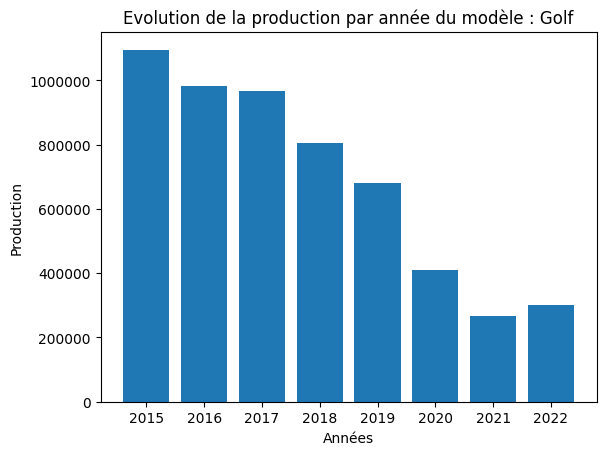

In [110]:
produ_model(dftot.columns[0])

<ipython-input-111-a58e9e9a8182>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


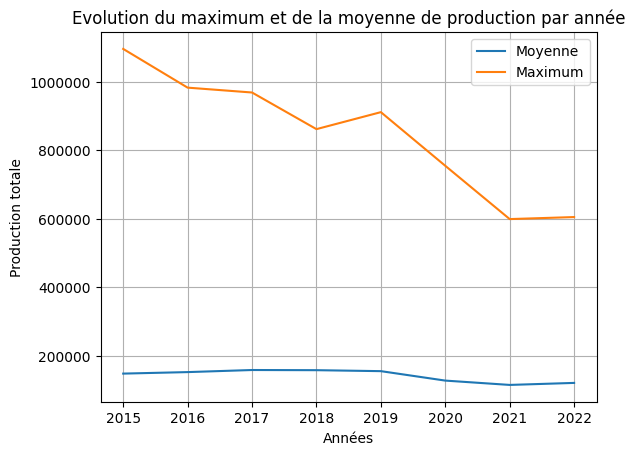

In [111]:
mean=[]
max=[]

for lignes in dftot.values:
  mean.append(lignes.mean())
  max.append(lignes.max())

x=dftot.index
plt.grid(True)
plt.plot(x,mean, label='Moyenne')
plt.plot(x,max,label='Maximum')
plt.xlabel('Années')
plt.ylabel('Production totale')
plt.legend()
plt.title('Evolution du maximum et de la moyenne de production par année')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

# Véhicules commerciaux production


In [112]:
def modif_com(df):
  df.dropna(axis=0, how= 'any', inplace = True)
  df.columns=df.iloc[0,:]
  df.reset_index(drop=True, inplace =True)
  df.drop([0],inplace=True)
  df.drop(df.columns[-1], axis=1, inplace=True)
  df = df.rename(columns={'Units': 'Année'})
  df.set_index('Année',inplace=True)
  df=df.T
  df.index = df.index.astype("int")
  return df

In [113]:

dfcom=pd.DataFrame()
for an in annees:
  if an < 20:
    lien="https://annualreport20"+str(an)+".volkswagenag.com/servicepages/downloads/files/vehicles_production_vw_ar"+str(an)+".xls"
    df = pd.read_excel(lien)
  elif an == 20 :
    lien ="https://annualreport20"+str(an)+".volkswagenag.com/servicepages/downloads/files/div-vehicles-production-vw-ar"+str(an)+".xls"
    df = pd.read_excel(lien)
  else:
    lien ="https://annualreport20"+str(an)+".volkswagenag.com/_assets/downloads/div-vehicles-production-vw-ar"+str(an)+".xlsx"
    df = pd.read_excel(lien)
  df=modif_com(df)
  dfcom=pd.concat([dfcom,df])
dfcom

Année,"Caravelle/Multivan, Kombi",Transporter,Amarok,Caddy,Caddy Kombi,Crafter,"Caravelle/Multivan, Kombi, California","Crafter, Grand California","Caddy, Caddy California",ID. Buzz
2015,96341.0,82509.0,81019.0,76048.0,74302.0,NaN,NaN,NaN,NaN,NaN
2016,117554.0,81932.0,63367.0,71757.0,86841.0,596.0,NaN,NaN,NaN,NaN
2017,115553.0,92876.0,80328.0,71501.0,93167.0,36313.0,NaN,NaN,NaN,NaN
2018,115525.0,86286.0,88950.0,71881.0,89154.0,67151.0,NaN,NaN,NaN,NaN
2019,96533.0,91585.0,68010.0,66780.0,81466.0,72906.0,NaN,NaN,NaN,NaN
2020,71813.0,66357.0,36343.0,48799.0,61998.0,58235.0,NaN,NaN,NaN,NaN
2021,NaN,80122.0,42755.0,NaN,40156.0,NaN,79379.0,58739.0,33805.0,NaN
2022,NaN,67508.0,42806.0,NaN,46500.0,NaN,80698.0,60326.0,42352.0,11013.0


In [114]:
dfcom.replace({np.nan: 0, '–': 0, '0': 0.0}, inplace=True)
dfcom = dfcom.astype('float')
dfcom

Année,"Caravelle/Multivan, Kombi",Transporter,Amarok,Caddy,Caddy Kombi,Crafter,"Caravelle/Multivan, Kombi, California","Crafter, Grand California","Caddy, Caddy California",ID. Buzz
2015,96341.0,82509.0,81019.0,76048.0,74302.0,0.0,0.0,0.0,0.0,0.0
2016,117554.0,81932.0,63367.0,71757.0,86841.0,596.0,0.0,0.0,0.0,0.0
2017,115553.0,92876.0,80328.0,71501.0,93167.0,36313.0,0.0,0.0,0.0,0.0
2018,115525.0,86286.0,88950.0,71881.0,89154.0,67151.0,0.0,0.0,0.0,0.0
2019,96533.0,91585.0,68010.0,66780.0,81466.0,72906.0,0.0,0.0,0.0,0.0
2020,71813.0,66357.0,36343.0,48799.0,61998.0,58235.0,0.0,0.0,0.0,0.0
2021,0.0,80122.0,42755.0,0.0,40156.0,0.0,79379.0,58739.0,33805.0,0.0
2022,0.0,67508.0,42806.0,0.0,46500.0,0.0,80698.0,60326.0,42352.0,11013.0


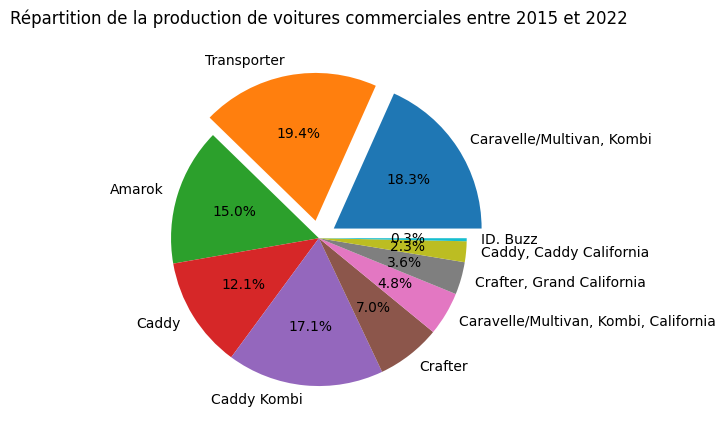

In [115]:
x=dfcom.sum()
expl=[]
for value in x :
  value=value/sum(x)*100
  if value > 18 :
    expl.append(0.12)
  else:
    expl.append(0)

plt.pie(x, labels=dfcom.columns, autopct='%1.1f%%', explode= expl)
plt.title(f'Répartition de la production de voitures commerciales entre {dfcom.index.min()} et {dfcom.index.max()}\n' )
plt.show()

Text(0.5, 1.0, 'Somme cumulée des véhicules produits par année \n')

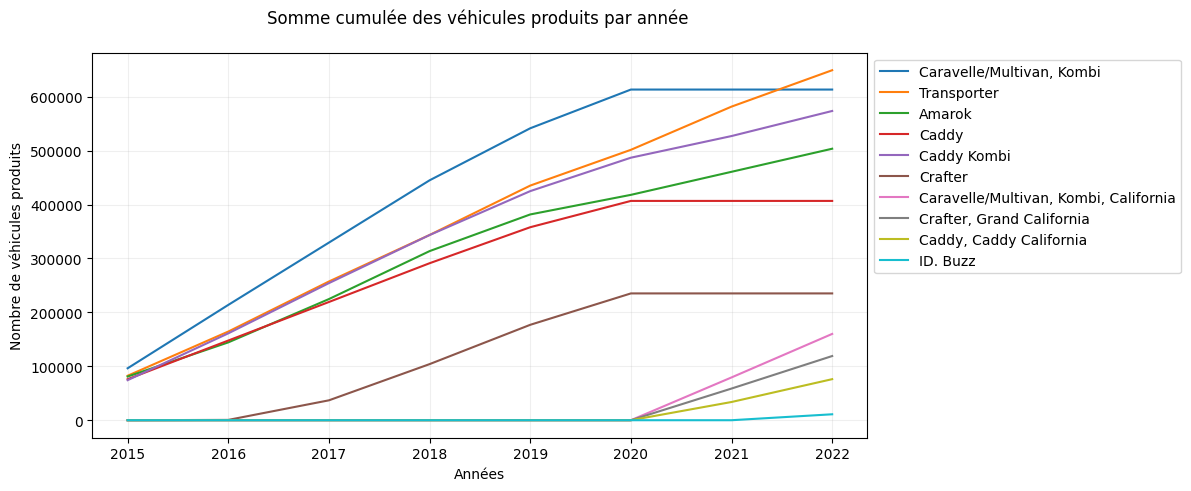

In [116]:
x=dfcom.index
plt.figure(figsize=(10,5))
plt.grid(True, alpha=0.2)
for vehicules in dfcom.columns :
  y=dfcom[vehicules].cumsum()
  plt.plot(x,y, label=vehicules)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Années')
plt.ylabel('Nombre de véhicules produits')
plt.title('Somme cumulée des véhicules produits par année \n')

#Véhicules Passagers Brand


In [117]:
# -*- coding: utf-8 -*-
def modif_brand(df):
    df.dropna(axis=0, how= 'any', inplace = True)
    df.reset_index(drop=True, inplace =True)
    df.drop(columns=['N-1', '%'], inplace=True)
    return df

In [118]:

dfbrand=pd.DataFrame()

for an in annees:
    if an < 20:
        lien="https://annualreport20"+str(an)+".volkswagenag.com/servicepages/downloads/files/vw_pc_key_figures_vw_ar"+str(an)+".xls"
        df = pd.read_excel(lien, names=['chiffre', '20'+ str(an), 'N-1', '%'])
    elif an == 20 :
        lien ="https://annualreport20"+str(an)+".volkswagenag.com/servicepages/downloads/files/div-vw-pc-key-figures-vw-ar"+str(an)+".xls"
        df = pd.read_excel(lien, names=['chiffre', '20'+ str(an), 'N-1', '%'])
    else:
        lien ="https://annualreport20"+str(an)+".volkswagenag.com/_assets/downloads/div-vw-pc-key-figures-vw-ar"+str(an)+".xlsx"
        df = pd.read_excel(lien, names=['chiffre', '20'+ str(an), 'N-1', '%'])
    df=modif_brand(df)
    dfbrand = pd.concat([dfbrand, df], axis=1).reset_index(drop=True)
index = dfbrand.iloc[:,0]
dfbrand.drop(dfbrand.iloc[:, 2::2], inplace=True, axis = 1)
dfbrand.index = list(index)
dfbrand

,2015,2016,2017,2018,2019,2020,2021,2022
Deliveries (thousand units),5823.0,5980.0,6230.0,6245.0,6278.0,5328.0,4897.0,4563.0
Vehicle sales,4424.0,4347.0,3573.0,3715.0,3677.0,2835.0,2719.0,2594.0
Production,5898.0,6073.0,6317.0,6297.0,6184.0,5081.0,4575.0,4811.0
Sales revenue (€ million),106240.0,105651.0,79979.0,84585.0,88407.0,71076.0,76127.0,73773.0
Operating result before special items,2102.0,1869.0,3301.0,3239.0,3785.0,454.0,2503.0,2647.0


<ipython-input-119-1421c146df22>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


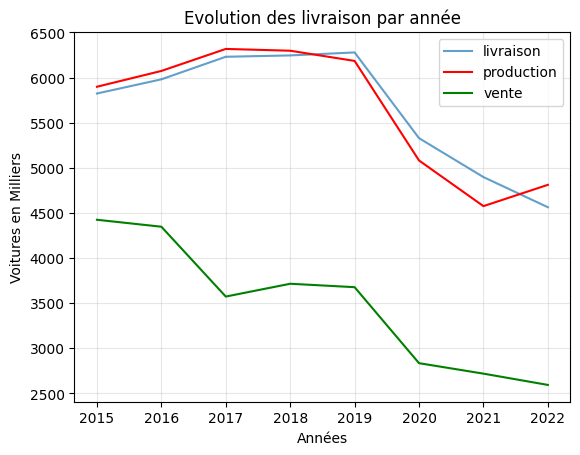

In [119]:
x = dfbrand.columns
livraison = dfbrand.iloc[0, :]
production = dfbrand.iloc[2, :]
vente = dfbrand.iloc[1, :]
plt.grid(alpha=0.3)
plt.plot(x,livraison, label="livraison", alpha=0.7)
plt.plot(x, production, c="red", label="production")
plt.plot(x, vente, c="green", label="vente")
plt.xlabel('Années')
plt.ylabel('Voitures en Milliers')
plt.title('Evolution des livraison par année')
plt.legend()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

<ipython-input-120-3976b70e040b>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


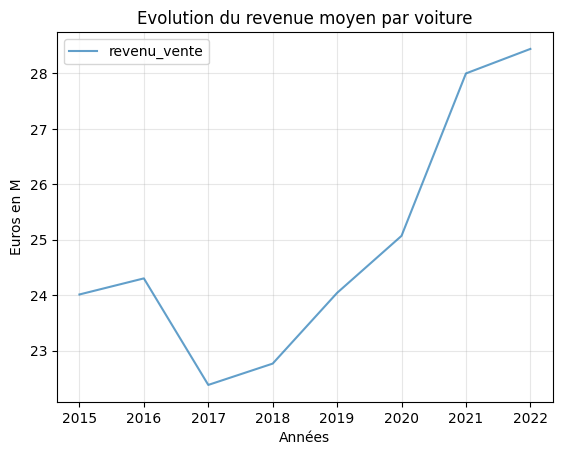

In [120]:
x = dfbrand.columns
revenu_vente = dfbrand.iloc[3, :] / dfbrand.iloc[1, :]
plt.grid(alpha=0.3)
plt.plot(x,revenu_vente, label="revenu_vente", alpha=0.7)

plt.xlabel('Années')
plt.ylabel('Euros en M')
plt.title('Evolution du revenue moyen par voiture')
plt.legend()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

<ipython-input-121-680a644f6400>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


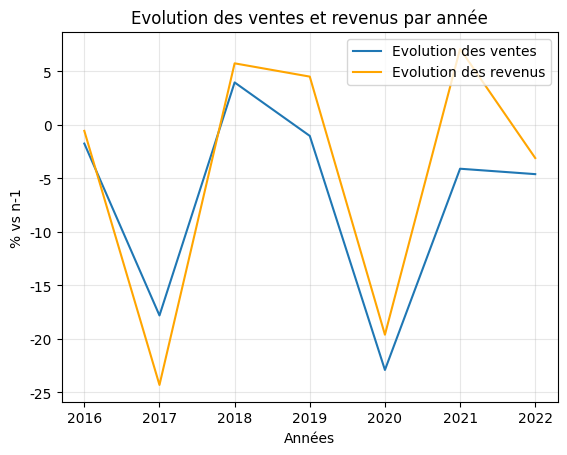

In [121]:
x = dfbrand.columns
y=vente.pct_change() * 100
revenu = dfbrand.iloc[3, :]
y2=revenu.pct_change() * 100
plt.grid(alpha=0.3)
plt.plot(x,y, label="Evolution des ventes")
plt.plot(x,y2, label="Evolution des revenus", color="orange")
plt.xlabel('Années')
plt.ylabel('% vs n-1')
plt.title('Evolution des ventes et revenus par année')
plt.legend()

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
plt.show()

In [122]:
vente.corr(revenu)

0.9378551391298026

# Véhicules Commerciaux Brand


In [123]:
def modif_brandcom(df):
    df.dropna(axis=0, how= 'any', inplace = True)
    df.reset_index(drop=True, inplace =True)
    df.drop(columns=['N-1', '%'], inplace=True)
    return df

In [124]:

dfbrandcom=pd.DataFrame()

for an in annees:
    if an < 20:
        lien="https://annualreport20"+str(an)+".volkswagenag.com/servicepages/downloads/files/vehicles_key_figures_vw_ar"+str(an)+".xls"
        df = pd.read_excel(lien, names=['chiffre', '20'+ str(an), 'N-1', '%'])
    elif an == 20 :
        lien ="https://annualreport20"+str(an)+".volkswagenag.com/servicepages/downloads/files/div-vehicles-key-figures-vw-ar"+str(an)+".xls"
        df = pd.read_excel(lien, names=['chiffre', '20'+ str(an), 'N-1', '%'])
    else:
        lien ="https://annualreport20"+str(an)+".volkswagenag.com/_assets/downloads/div-vehicles-key-figures-vw-ar"+str(an)+".xlsx"
        df = pd.read_excel(lien, names=['chiffre', '20'+ str(an), 'N-1', '%'])
    df=modif_brandcom(df)
    dfbrandcom = pd.concat([dfbrandcom, df], axis=1).reset_index(drop=True)
index = dfbrandcom.iloc[:,0]
dfbrandcom.drop(dfbrandcom.iloc[:, 2::2], inplace=True, axis = 1)
dfbrandcom.index = list(index)
dfbrandcom

,2015,2016,2017,2018,2019,2020,2021,2022
Deliveries (thousand units),431.0,478.0,498.0,500.0,492.0,372.0,360.0,329.0
Vehicle sales,456.0,478.0,498.0,469.0,456.0,345.0,326.0,340.0
Production,410.0,422.0,490.0,519.0,477.0,344.0,335.0,351.0
Sales revenue (€ million),10341.0,11120.0,11909.0,11875.0,11473.0,9358.0,9909.0,11455.0
Operating result before special items,382.0,455.0,853.0,780.0,510.0,-454.0,73.0,529.0


## Comparaison entre véhicules commerciaux et véhicules particuliers

In [125]:
import seaborn as sns

In [126]:
y=dfbrandcom.iloc[2,:].cumsum()
y2=dfbrand.iloc[2,:].cumsum()

dic= {'Passager':y2,'Commerciaux':y}
df=pd.DataFrame(dic)
df

,Passager,Commerciaux
2015,5898.0,410.0
2016,11971.0,832.0
2017,18288.0,1322.0
2018,24585.0,1841.0
2019,30769.0,2318.0
2020,35850.0,2662.0
2021,40425.0,2997.0
2022,45236.0,3348.0


Text(0.5, 1.0, 'Somme cumulée de la production des véhicules passagers et commerciaux depuis 2015 \n')

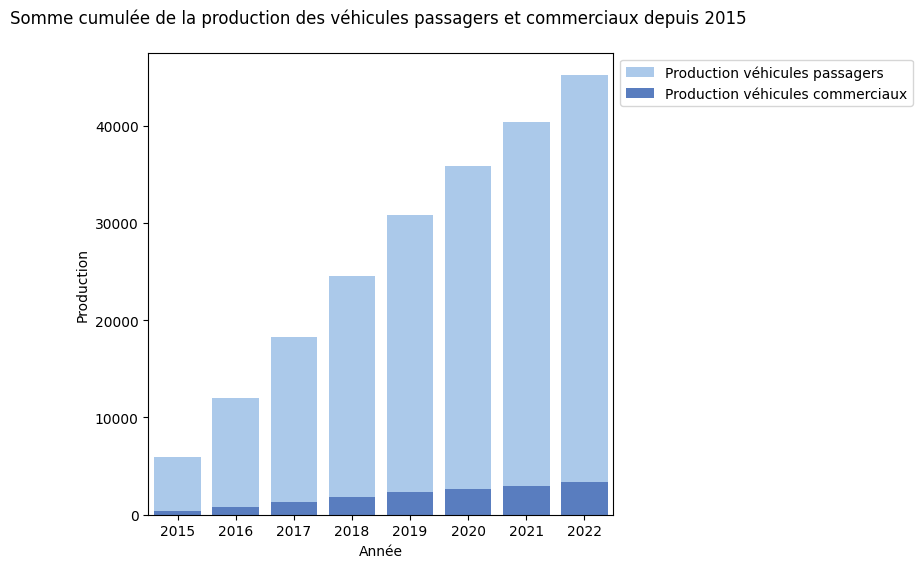

In [127]:
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x=df.index, y="Passager", data=df,
            label="Production véhicules passagers", color="b")

sns.set_color_codes("muted")
sns.barplot(x=df.index, y="Commerciaux", data=df,
            label="Production véhicules commerciaux", color="b")


ax.legend(loc="upper left", frameon=True, bbox_to_anchor=(1,1))
ax.set(ylabel="Production", xlabel="Année")
ax.set_title(f'Somme cumulée de la production des véhicules passagers et commerciaux depuis {df.index.min()} \n')

In [128]:
y=dfbrandcom.iloc[3,:].cumsum()
y2=dfbrand.iloc[3,:].cumsum()

dic= {'Passager':y2,'Commerciaux':y}
df=pd.DataFrame(dic)
df

,Passager,Commerciaux
2015,106240.0,10341.0
2016,211891.0,21461.0
2017,291870.0,33370.0
2018,376455.0,45245.0
2019,464862.0,56718.0
2020,535938.0,66076.0
2021,612065.0,75985.0
2022,685838.0,87440.0


Text(0.5, 1.0, 'Somme cumulée des revenus des véhicules passagers et commerciaux depuis 2015 \n')

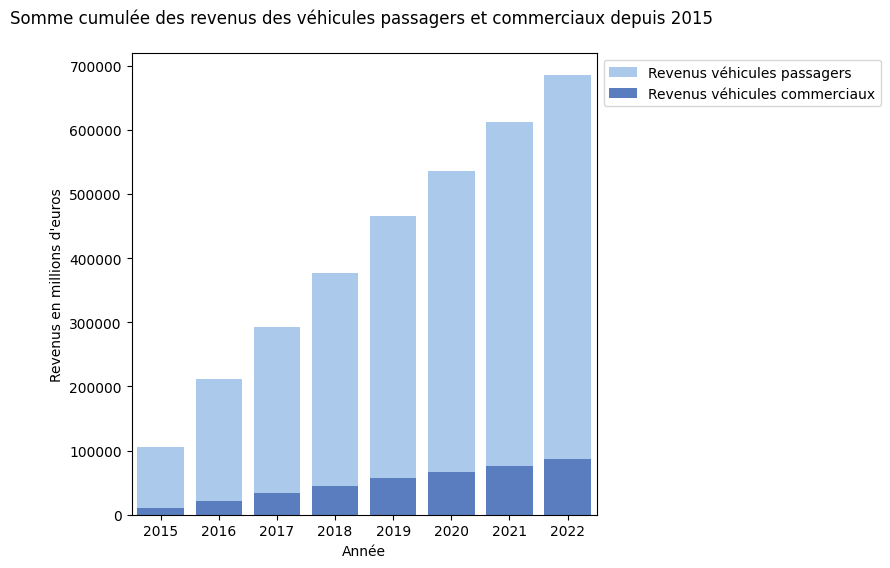

In [129]:
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x=df.index, y="Passager", data=df,
            label="Revenus véhicules passagers", color="b")

sns.set_color_codes("muted")
sns.barplot(x=df.index, y="Commerciaux", data=df,
            label="Revenus véhicules commerciaux", color="b")


ax.legend(loc="upper left", frameon=True, bbox_to_anchor=(1,1))
ax.set(ylabel="Revenus en millions d'euros", xlabel="Année")
ax.set_title(f'Somme cumulée des revenus des véhicules passagers et commerciaux depuis {df.index.min()} \n')

In [130]:
y=dfbrandcom.iloc[1,:].cumsum()
y2=dfbrand.iloc[1,:].cumsum()

dic= {'Passager':y2,'Commerciaux':y}
df=pd.DataFrame(dic)
df

,Passager,Commerciaux
2015,4424.0,456.0
2016,8771.0,934.0
2017,12344.0,1432.0
2018,16059.0,1901.0
2019,19736.0,2357.0
2020,22571.0,2702.0
2021,25290.0,3028.0
2022,27884.0,3368.0


Text(0.5, 1.0, 'Somme cumulée des ventes de véhicules passagers et commerciaux depuis 2015 \n')

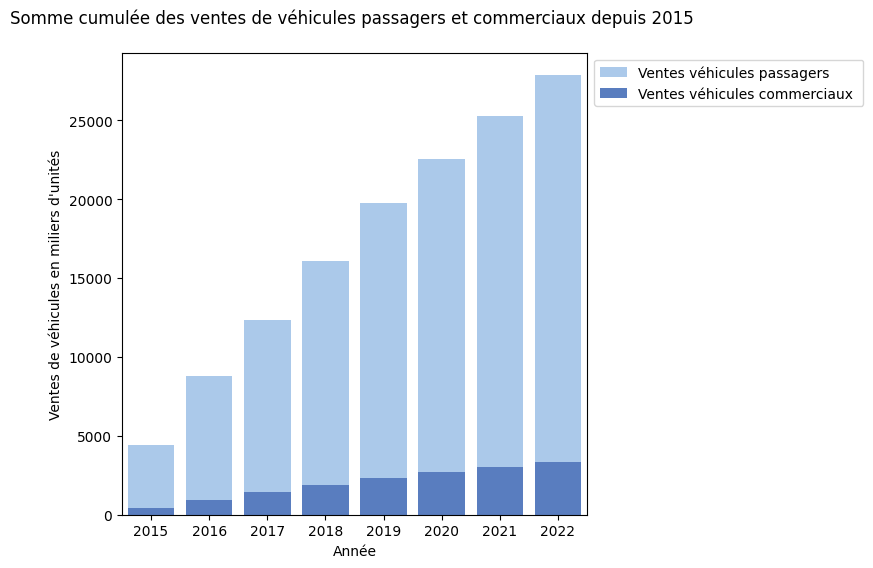

In [131]:
f, ax = plt.subplots(figsize=(6, 6))

sns.set_color_codes("pastel")
sns.barplot(x=df.index, y="Passager", data=df,
            label="Ventes véhicules passagers", color="b")

sns.set_color_codes("muted")
sns.barplot(x=df.index, y="Commerciaux", data=df,
            label="Ventes véhicules commerciaux ", color="b")


ax.legend(loc="upper left", frameon=True, bbox_to_anchor=(1,1))
ax.set(ylabel="Ventes de véhicules en miliers d'unités", xlabel="Année")
ax.set_title(f'Somme cumulée des ventes de véhicules passagers et commerciaux depuis {df.index.min()} \n')